In [2]:
import fig_lib 
import CNN_lib
import CNN_utilities
import numpy as np
import pandas as pd
import json
import cv2

In [3]:
json_fix_sq_p='C:\PROJECTS\emboendo\dicom_viewer\_static\Jsons\points_fix_d.json'

with open(json_fix_sq_p, 'r') as json_file:
    json_d = json.load(json_file)



In [4]:
patients_recs_d_df=CNN_utilities.main_d_df()
patients_labels_d_df=CNN_utilities.labels_df()
patients_d_df=pd.merge( patients_labels_d_df,patients_recs_d_df, on='PatientID')

def find_recs(row):

    rec_true = [record for record in row['Records'] if record in list(json_d.keys())]

    return pd.Series({'recs_crop': rec_true})

new_col = patients_d_df.apply(find_recs, axis=1)
patients_d_df = pd.concat([patients_d_df, new_col], axis=1)
patients_d_df=patients_d_df.drop('Records', axis=1)
patients_d_df =  patients_d_df[patients_d_df['recs_crop'].apply(lambda x: x != [])]

display(patients_d_df)

,PatientID,Sex,Age,S.E.,M.A.,A.C.V.,label,recs_crop
0,62,0,67,0,0,0,0,"[I1, I11, I2, I9]"
1,76,1,72,0,0,0,0,"[I28, I33, I38, I39, I40, I42, I44, I45, I47, ..."
2,93,0,78,0,0,0,0,"[I51, I53, I54, I56, I57, I58, I61, I63, I64, ..."
3,103,0,82,1,0,0,1,"[I70, I71, I72, I73]"
4,105,1,57,1,0,0,1,"[I101, I102, I103, I86, I87, I89, I90, I91, I9..."
...,...,...,...,...,...,...,...,...
82,109897,1,79,0,0,0,0,"[109897_1, 109897_2, 109897_3, 109897_4, 10989..."
83,669183,1,78,0,0,1,1,"[669183_1, 669183_10, 669183_2, 669183_3, 6691..."
84,670615,1,80,1,0,2,1,"[670615_10, 670615_13, 670615_14, 670615_15, 6..."
85,224436,1,77,0,0,0,0,"[224436_1, 224436_10, 224436_11, 224436_12, 22..."


In [5]:
input_d={}    

for label,ii in zip(patients_d_df['label'],patients_d_df['recs_crop']):
    
    for rec in ii:

        input_d[rec]={'label':label}
        vd_ls=[]

        for i in range(len(json_d[rec])):
            
            try:
                image_8bit=np.load(json_d[rec][str(i)]['sq_image'])
                width=np.shape(image_8bit)[0]
                height = np.shape(image_8bit)[1]
                vd_ls.append(image_8bit)
            except:pass
            
        input_d[rec]['image']=np.array(vd_ls)
        input_d[rec]['dimHW']= [height,width]  

In [6]:
for R in input_d.keys():
    print(R,input_d[R]['label'],np.shape(input_d[R]['image']),type(input_d[R]['image']))

I1 0 (44, 600, 800) <class 'numpy.ndarray'>
I11 0 (53, 600, 800) <class 'numpy.ndarray'>
I2 0 (44, 600, 800) <class 'numpy.ndarray'>
I9 0 (52, 600, 800) <class 'numpy.ndarray'>
I28 0 (23, 434, 636) <class 'numpy.ndarray'>
I33 0 (24, 434, 636) <class 'numpy.ndarray'>
I38 0 (24, 434, 636) <class 'numpy.ndarray'>
I39 0 (24, 434, 636) <class 'numpy.ndarray'>
I40 0 (20, 434, 636) <class 'numpy.ndarray'>
I42 0 (22, 434, 636) <class 'numpy.ndarray'>
I44 0 (23, 434, 636) <class 'numpy.ndarray'>
I45 0 (24, 434, 636) <class 'numpy.ndarray'>
I47 0 (23, 434, 636) <class 'numpy.ndarray'>
I49 0 (23, 434, 636) <class 'numpy.ndarray'>
I51 0 (39, 422, 636) <class 'numpy.ndarray'>
I53 0 (39, 422, 636) <class 'numpy.ndarray'>
I54 0 (39, 422, 636) <class 'numpy.ndarray'>
I56 0 (39, 422, 636) <class 'numpy.ndarray'>
I57 0 (39, 422, 636) <class 'numpy.ndarray'>
I58 0 (39, 422, 636) <class 'numpy.ndarray'>
I61 0 (39, 422, 636) <class 'numpy.ndarray'>
I63 0 (39, 422, 636) <class 'numpy.ndarray'>
I64 0 (39, 42

In [7]:
d_plt_check,rec_check=True,'673676_1'
t_btw_frm=0.05
print(input_d[rec_check]['label'])

0


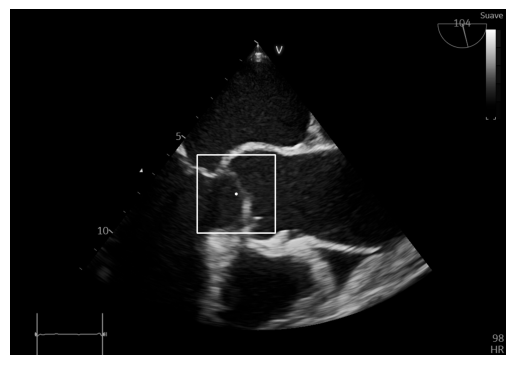

In [12]:
fig_lib.vid_show(input_d[rec_check]['image'],t_btw_frm=t_btw_frm)

# VIDEO GENERATION


In [9]:
output_p="C:/Users/Daniel/Desktop/Videos/"

In [10]:

fourcc = cv2.VideoWriter_fourcc(*'mp4v')  # Puedes ajustar el codec según tus necesidades
fps = 8
i=0

for R,data in input_d.items():

    output_path =output_p+R+'.mp4'    
    video_writer = cv2.VideoWriter(output_path, fourcc, fps, (data['dimHW'][0],data['dimHW'][1]), isColor=False)
    

    for im in data['image']:
        
        frame = im.astype(np.uint8)

        #frame = np.random.randint(0, 256, size=(600,800), dtype=np.uint8)
        video_writer.write(frame)

    video_writer.release()
    
    print(i,output_path)
    i+=1
    

0 C:/Users/Daniel/Desktop/Videos/I1.mp4
1 C:/Users/Daniel/Desktop/Videos/I11.mp4
2 C:/Users/Daniel/Desktop/Videos/I2.mp4
3 C:/Users/Daniel/Desktop/Videos/I9.mp4
4 C:/Users/Daniel/Desktop/Videos/I28.mp4
5 C:/Users/Daniel/Desktop/Videos/I33.mp4
6 C:/Users/Daniel/Desktop/Videos/I38.mp4
7 C:/Users/Daniel/Desktop/Videos/I39.mp4
8 C:/Users/Daniel/Desktop/Videos/I40.mp4
9 C:/Users/Daniel/Desktop/Videos/I42.mp4
10 C:/Users/Daniel/Desktop/Videos/I44.mp4
11 C:/Users/Daniel/Desktop/Videos/I45.mp4
12 C:/Users/Daniel/Desktop/Videos/I47.mp4
13 C:/Users/Daniel/Desktop/Videos/I49.mp4
14 C:/Users/Daniel/Desktop/Videos/I51.mp4
15 C:/Users/Daniel/Desktop/Videos/I53.mp4
16 C:/Users/Daniel/Desktop/Videos/I54.mp4
17 C:/Users/Daniel/Desktop/Videos/I56.mp4
18 C:/Users/Daniel/Desktop/Videos/I57.mp4
19 C:/Users/Daniel/Desktop/Videos/I58.mp4
20 C:/Users/Daniel/Desktop/Videos/I61.mp4
21 C:/Users/Daniel/Desktop/Videos/I63.mp4
22 C:/Users/Daniel/Desktop/Videos/I64.mp4
23 C:/Users/Daniel/Desktop/Videos/I65.mp4
24 C: